In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
A=pd.read_csv('/Users/HP/Downloads/Datasets/ab2.csv')

In [3]:
A.head()

,Unnamed: 0,RND,ADMIN,MKT,STATE,PROFIT,PR0FIT_TYPE
0,1,165349.20,136897.80,471784.10,New York,192261.83,1
1,2,162597.70,151377.59,443898.53,California,191792.06,1
2,3,153441.51,101145.55,407934.54,Florida,191050.39,1
3,4,144372.41,118671.85,383199.62,New York,182901.99,1
4,5,142107.34,91391.77,366168.42,Florida,166187.94,1


In [4]:
A.shape

(50, 7)

In [5]:
A.columns

Index(['Unnamed: 0', 'RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT', 'PR0FIT_TYPE'], dtype='object')

In [6]:
A.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
A.describe()

,RND,ADMIN,MKT,PROFIT,PR0FIT_TYPE
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.500000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.505076
min,0.000000,51283.140000,0.000000,14681.400000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.500000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000


In [8]:
#finding if its missinf value is present in dataset or not.
A.isnull().sum()

RND            0
ADMIN          0
MKT            0
STATE          0
PROFIT         0
PR0FIT_TYPE    0
dtype: int64

In [9]:
CAT=[]
CON=[]
for i in A.columns:
    if(A[i].dtypes=="object"):
        CAT.append(i)
    else:
        CON.append(i)

In [10]:
CAT

['STATE']

In [11]:
CON

['RND', 'ADMIN', 'MKT', 'PROFIT', 'PR0FIT_TYPE']

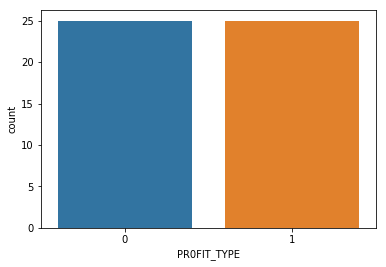

In [13]:
#Univariate analysis
sb.countplot(A.PR0FIT_TYPE)

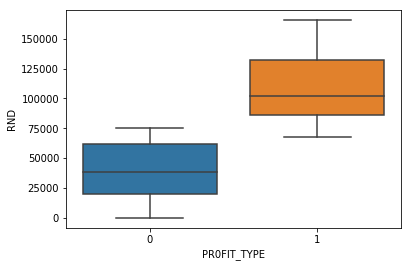

In [17]:
#bivariate analysis
sb.boxplot(A.PR0FIT_TYPE, A.RND)

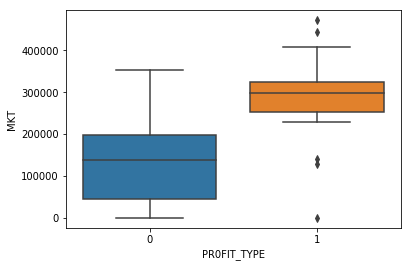

In [18]:
#bivariate analysis
sb.boxplot(A.PR0FIT_TYPE, A.MKT)

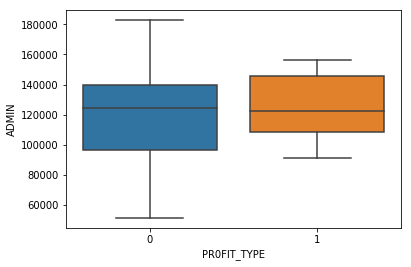

In [19]:
#bivariate analysis
sb.boxplot(A.PR0FIT_TYPE, A.ADMIN)

from the bivariate analysis we found that their is a linear relation between RND And MKT with Profit_type.

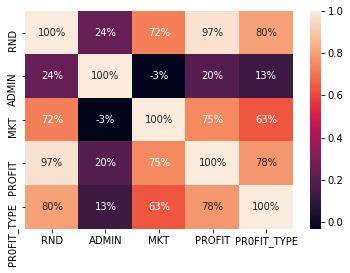

In [20]:
#for correlation matrix we use heatmap.
sb.heatmap(A.corr(), annot=True, fmt='.0%')

In [25]:
#try to estimate the best model to predict Profit_type
X=A[['RND','MKT']]
Y=A[['PR0FIT_TYPE']]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.20)

In [28]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain, ytrain)
pred = model.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(ytest, pred)*100)
print(confusion_matrix(ytest, pred))

60.0
[[3 4]
 [0 3]]


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [29]:
#using random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10, max_depth=4)
model=rfc.fit(xtrain, ytrain)
pred=model.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(ytest, pred)*100)
print(confusion_matrix(ytest, pred))

100.0
[[7 0]
 [0 3]]


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model = dtc.fit(xtrain, ytrain)
pred = model.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(ytest, pred)*100)
print(confusion_matrix(ytest, pred))


100.0
[[7 0]
 [0 3]]


In [31]:
#for finding the best parameter for tunning the model 
from sklearn.model_selection import GridSearchCV
tp={'max_depth':range(2,20,1)}
cv=GridSearchCV(rfc, tp, scoring="accuracy", cv=3)
cvmodel=cv.fit(X,Y)
cvmodel.best_params_

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed whe

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed whe

{'max_depth': 17}

from the above observations we found that the best model for prediction the profit_type is random_forest_classisfier and decision_tree. hence i have used random forest classifier.